In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your features dataset
data = pd.read_csv('data/HR_data.csv')

#### Converting data to integer ####
data['Round'] = data['Round'].str.lstrip('round_').astype(int)
data['Phase'] = data['Phase'].str.lstrip('phase').astype(int)

### Dropping data ###
#show missing value in features at EDA_TD_P_RT and EDA_TD_P_ReT
#print(data[data.isna().any(axis=1)])
#just drop this row
data = data.dropna()

### splitting into features and responses ###
features = data.iloc[:, :-12]
response = data.iloc[:, -16:]
print(response.head())


#Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


   Round  Phase  Individual  Puzzler  Frustrated Cohort  upset  hostile  \
0      3      3           1        1         2.0   D1_4    1.0      1.0   
1      3      2           1        1         3.0   D1_4    2.0      1.0   
2      3      1           1        1         2.0   D1_4    1.0      1.0   
3      2      3           1        1         2.0   D1_4    1.0      1.0   
4      2      2           1        1         2.0   D1_4    3.0      1.0   

   alert  ashamed  inspired  nervous  attentive  afraid  active  determined  
0    2.0      1.0       2.0      2.0        3.0     1.0     2.0         2.0  
1    3.0      2.0       2.0      2.0        3.0     1.0     3.0         3.0  
2    2.0      1.0       3.0      2.0        3.0     2.0     3.0         3.0  
3    2.0      1.0       3.0      2.0        3.0     2.0     3.0         3.0  
4    3.0      2.0       3.0      3.0        4.0     2.0     4.0         4.0  


In [59]:
# Display column names
print("Column Names:")
print(data.columns)

# Display data types of each column
print("\nData Types:")
print(data.dtypes)

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display the first few rows of the data
print("\nFirst Few Rows:")
print(data.head())

Column Names:
Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT

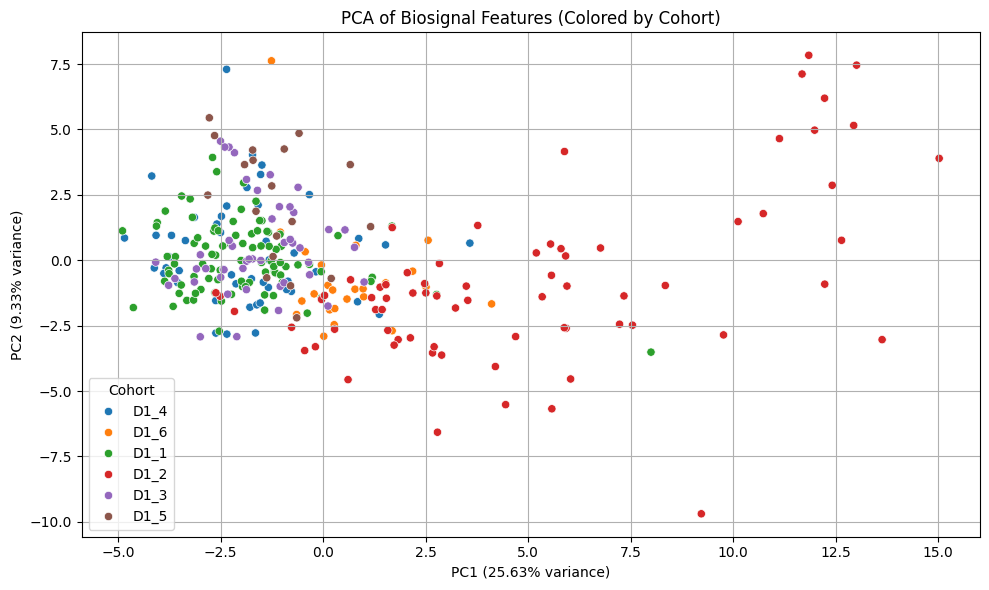

In [ ]:
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=pca_scores, columns=['PC1', 'PC2'])


pca_df['Cohort'] = response['Cohort']
pca_df['Frustrated'] = response['Frustrated']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cohort', palette='tab10')
plt.title('PCA of Biosignal Features (Colored by Cohort)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()



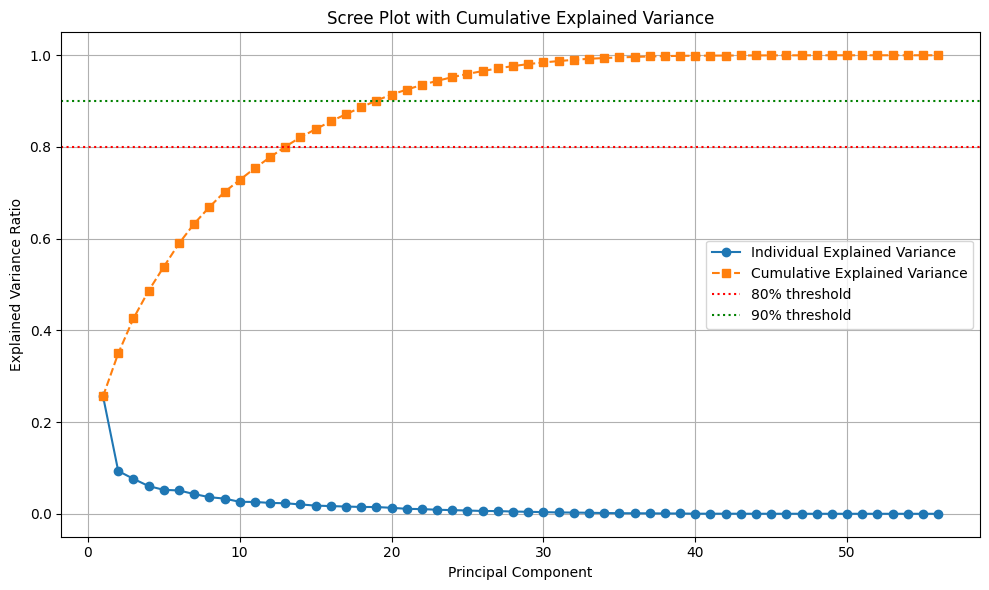

In [ ]:
cumulative_variance = full_pca.explained_variance_ratio_.cumsum()

# Plot both explained variance and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(full_pca.explained_variance_ratio_) + 1), 
         full_pca.explained_variance_ratio_, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), 
         cumulative_variance, marker='s', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle=':', label='80% threshold')
plt.axhline(y=0.90, color='g', linestyle=':', label='90% threshold')
plt.title('Scree Plot with Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
from sklearn.decomposition import SparsePCA

n_components = 15

spca = SparsePCA(n_components=n_components, alpha=1, random_state=42)
spca_components = spca.fit_transform(features_scaled)

loadings = pd.DataFrame(spca.components_, columns=data.columns[:-12])


In [91]:
nonzero_counts = (loadings != 0).sum(axis=1)
print("Non-zero coefficients per component:")
print(nonzero_counts)


Non-zero coefficients per component:
0     20
1     14
2     15
3     10
4      9
5     10
6     12
7      6
8      8
9     18
10     8
11     8
12     9
13     6
14     5
dtype: int64


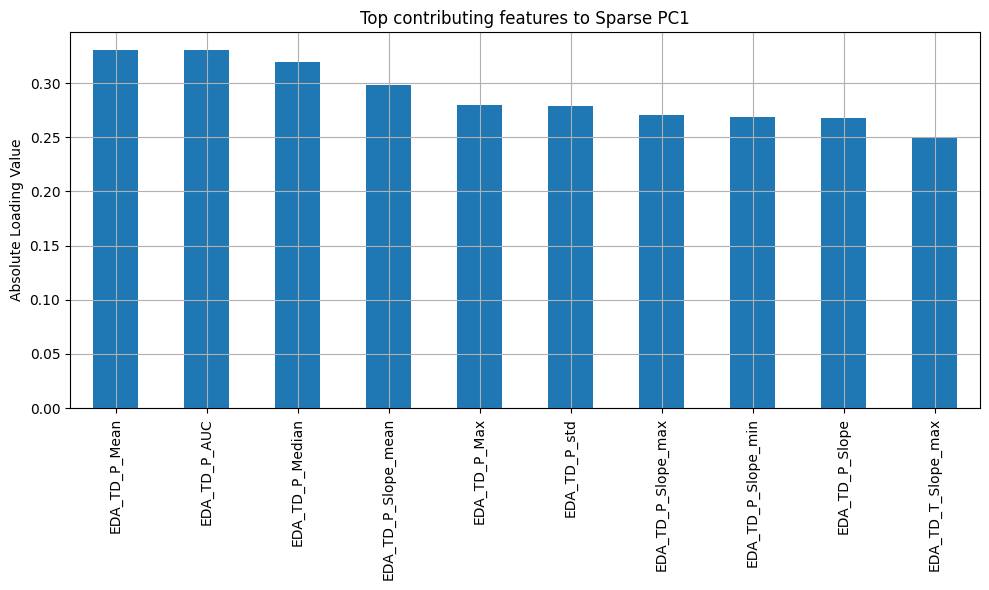

In [92]:
top_features_pc1 = loadings.iloc[0].abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_features_pc1.plot(kind='bar')
plt.title("Top contributing features to Sparse PC1")
plt.ylabel("Absolute Loading Value")
plt.grid(True)
plt.tight_layout()
plt.show()
